# 3.1. (Mouse) Prepare HitPredict protein-protein interaction network

Filter out interactions with low confidence score and remove self loops.

Use gene names.

Confidence score threshold was set at 0.281 as recommended by López et al. (2015) to get high-quality interactions.

## Input
* `data-create_networks/hitpredit-03Aug2020/M_musculus_interactions_MITAB-2.5.txt`: HitPredict protein-protein interactions for yeast as psi-mi 2.5 tab file.

## Output

* `data-create_networks/hitpredit-03Aug2020/mouse_ppi.tsv`: cleaned HitPredict protein-protein interaction network.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hitpredict_file = '../../../data-create_networks/hitpredit-03Aug2020/M_musculus_interactions_MITAB-2.5.txt'
ppiTable_file = '../../../data-create_networks/hitpredit-03Aug2020/mouse_ppi.tsv'

## Import data

In [3]:
hitpred = pd.read_csv( hitpredict_file, sep='\t', header=None, skiprows=6 )[[ 2, 3, 14 ]].rename(
    {2: 'source', 3: 'target', 14: 'score'}, axis=1)

hitpred['source'] = hitpred['source'].str.replace('_MOUSE\(gene name\)', '')
hitpred['target'] = hitpred['target'].str.replace('_MOUSE\(gene name\)', '')

## Filter out low confidence score interactions

number of raw interactions: 34154
with score >= 0.281: 31344


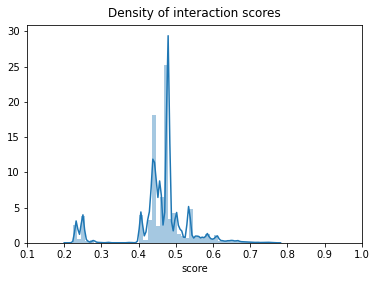

In [4]:
hitpred_filt = hitpred[ hitpred['score'] >= 0.281 ]

print( 'number of raw interactions:', len(hitpred) )
print( 'with score >= 0.281:', len(hitpred_filt) )

g = sns.distplot( hitpred.loc[ :, 'score' ] )
plt.xlim([0.1,1])
plt.title( 'Density of interaction scores', y=1.01 )
plt.show()

## Clean interaction matrix

In [5]:
# check there are no redundant entries
x = hitpred[['source', 'target']].copy()
x.values.sort()
print('no duplicated entry:', len( x.drop_duplicates() ) == len( hitpred ))

# remove self loops
print( 'number of self loops:', len( hitpred[ hitpred['source'] == hitpred['target'] ] ) )
ppi = hitpred[ hitpred['source'] != hitpred['target'] ]

no duplicated entry: True
number of self loops: 589


## Export

In [6]:
print('interactions:', len(ppi))
print('proteins:', len( set(ppi['source']) | set(ppi['target'])) )

interactions: 33565
proteins: 9509


In [7]:
ppi.to_csv( ppiTable_file, sep='\t', index=False )